<a href="https://colab.research.google.com/github/Zabala2612/EMPRESAS-EN-REORGANIZACION/blob/main/de_Empresas_en_Reorganizacion_Final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<div align="center">
<table>
    <thead>
        <tr>
            <td rowspan="3">
                <img alt="UdeA" height="200px" src="https://raw.githubusercontent.com/juliancastillo-udea/2024-1-ProgramacionPosgrados/main/images/Escudo-UdeA.svg" hspace="10px" vspace="0px">
            </td>
            <td>
                <h1><b>FACULTAD DE INGENIERÍA -
DEPARTAMENTO DE INGENIERÍA INDUSTRIAL</b></h1>
            </td>
             </tr>
              <td>
                <h1><b>ANALÍTICA PARA LA TOMA DE DECISIONES</b></h1>
            </td>
        <tr>
            <td>
                <h1><b>PROYECTO DE AULA - EMPRESAS EN REORGANIZACIÓN</b></h1>
            </td>
        </tr>
        <tr>
        
            
    
    
</table>

</div>

<hr size=10 noshade color="green">


<div align="left">

<h2> <b> Por: Juan David Zabala Chaparro. </b> </h2>
<a href="mailto:juan.zabala2@udea.edu.co"> ✉ Juan David Zabala Chaparro </a>


</div>

<br>


In [ ]:
#Librerías
import pandas as pd
import numpy as np
import math
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, silhouette_score
from sklearn.cluster import KMeans,AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from IPython.display import display
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_moons



In [ ]:
! git clone https://github.com/Zabala2612/EMPRESAS-EN-REORGANIZACION.git

fatal: destination path 'EMPRESAS-EN-REORGANIZACION' already exists and is not an empty directory.


In [ ]:
df = pd.read_excel('/content/EMPRESAS-EN-REORGANIZACION/BD empresas en re organización.xlsx')
df.head()

,Razón Social,Margen EBIT,Carga financiera,Margen neto,CxC,CxP,Solvencia,Apalancamiento,En Reorganización
0,AACER SAS,0.071690,0.000000,0.042876,0.104095,0.153192,1.877078,1.642505,0
1,ABARROTES EL ROMPOY SAS,0.017816,0.000000,0.010767,0.018414,0.000000,0.000000,0.865044,0
2,ABASTECIMIENTOS INDUSTRIALES SAS,0.144646,0.054226,0.059784,0.227215,0.025591,1.077412,1.272299,0
3,ACME LEON PLASTICOS SAS,0.004465,0.000000,-0.013995,0.073186,0.127866,0.000000,1.391645,0
4,ADVANCED PRODUCTS COLOMBIA SAS,0.141829,0.050810,0.053776,0.398755,0.147678,0.675073,2.118774,0


#**Contexto de la base de datos**
La base de datos “BD empresas en re organización.xlsx” reúne información financiera de 629 empresas colombianas con el fin de analizar su situación económica y determinar si se encuentran en procesos de reorganización empresarial. Contiene variables contables y financieras clave como el Margen EBIT (rentabilidad operativa), la Carga financiera (peso de los costos financieros), el Margen neto (rentabilidad final), las Cuentas por Cobrar y Cuentas por Pagar (indicadores de liquidez y gestión de cartera), así como indicadores de Solvencia (capacidad de cubrir obligaciones con activos) y Apalancamiento (nivel de endeudamiento frente al patrimonio). Además, incluye una variable binaria llamada “En Reorganización”, que indica si la empresa atraviesa o no este proceso.

#**1. Exploración y selección de variables**

In [ ]:

# Exploración inicial
print("\nDimensiones:", df.shape)
print("\nPrimeras filas:\n", df.head())
print("\nTipos de datos:\n", df.dtypes)
print("\nValores nulos por columna:\n", df.isnull().sum())


Dimensiones: (629, 9)

Primeras filas:
                        Razón Social  Margen EBIT  Carga financiera  \
0                         AACER SAS     0.071690          0.000000   
1           ABARROTES EL ROMPOY SAS     0.017816          0.000000   
2  ABASTECIMIENTOS INDUSTRIALES SAS     0.144646          0.054226   
3           ACME LEON PLASTICOS SAS     0.004465          0.000000   
4    ADVANCED PRODUCTS COLOMBIA SAS     0.141829          0.050810   

   Margen neto       CxC       CxP  Solvencia  Apalancamiento  \
0     0.042876  0.104095  0.153192   1.877078        1.642505   
1     0.010767  0.018414  0.000000   0.000000        0.865044   
2     0.059784  0.227215  0.025591   1.077412        1.272299   
3    -0.013995  0.073186  0.127866   0.000000        1.391645   
4     0.053776  0.398755  0.147678   0.675073        2.118774   

   En Reorganización  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

Tipos de

In [ ]:
# Copia del dataset original para trabajar
df_clean = df.copy()

# Definir columnas a excluir (identificación/objetivo)
cols_excluir = ["razon social", "estado empresa", "razon_social", "estado_empresa"]
candidatas = [c for c in df_clean.columns if c not in cols_excluir]


for col in candidatas:
    df_clean[col] = (
        df_clean[col]
        .astype(str)
        .str.replace(",", ".", regex=False)        # reemplazar comas por puntos
    )
    df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

# Seleccionar solo numéricas
df_num = df_clean.select_dtypes(include=["int64", "float64"])

print("Variables numéricas detectadas:", df_num.columns.tolist())
print(df_num.head())

Variables numéricas detectadas: ['Razón Social', 'Margen EBIT', 'Carga financiera', 'Margen neto', 'CxC', 'CxP', 'Solvencia', 'Apalancamiento', 'En Reorganización']
   Razón Social  Margen EBIT  Carga financiera  Margen neto       CxC  \
0           NaN     0.071690          0.000000     0.042876  0.104095   
1           NaN     0.017816          0.000000     0.010767  0.018414   
2           NaN     0.144646          0.054226     0.059784  0.227215   
3           NaN     0.004465          0.000000    -0.013995  0.073186   
4           NaN     0.141829          0.050810     0.053776  0.398755   

        CxP  Solvencia  Apalancamiento  En Reorganización  
0  0.153192   1.877078        1.642505                  0  
1  0.000000   0.000000        0.865044                  0  
2  0.025591   1.077412        1.272299                  0  
3  0.127866   0.000000        1.391645                  0  
4  0.147678   0.675073        2.118774                  0  


In [ ]:
# Eliminar columna de texto
numeric_df = df.drop(columns=["Razón Social"])

# Calcular estadísticas descriptivas
desc_stats = numeric_df.describe().T

# Agregar el rango (máx - mín)
desc_stats["range"] = desc_stats["max"] - desc_stats["min"]

# Seleccionar columnas relevantes y redondear
desc_stats = desc_stats[["mean", "std", "min", "25%", "50%", "75%", "max", "range"]].round(4)

# Mostrar tabla
desc_stats

,mean,std,min,25%,50%,75%,max,range
Margen EBIT,0.0046,0.3712,-3.5203,0.0096,0.0436,0.0933,2.2524,5.7727
Carga financiera,0.0186,0.0309,0.0000,0.0000,0.0063,0.0274,0.3184,0.3184
Margen neto,-0.0262,0.3576,-3.5203,0.0001,0.0202,0.0530,1.6604,5.1807
CxC,0.5733,1.4166,0.0000,0.0944,0.2117,0.3934,15.8230,15.8230
CxP,0.3330,0.8203,0.0000,0.0504,0.1255,0.2485,8.1973,8.1973
Solvencia,0.3029,0.7720,-3.9576,0.0000,0.0467,0.4284,4.9023,8.8599
Apalancamiento,0.9111,1.0631,-0.9080,0.2113,0.6187,1.3776,7.0212,7.9291
En Reorganización,0.5437,0.4985,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000


Las estadísticas descriptivas evidencian que la mayoría de los indicadores financieros presentan una alta dispersión y valores extremos, lo que refleja la heterogeneidad de las empresas analizadas. Los márgenes EBIT y Neto, con medias cercanas a cero pero rangos amplios (5.77 y 5.18), muestran que coexisten compañías con fuertes pérdidas y otras con rentabilidades elevadas; en contraste, la Carga Financiera mantiene valores muy bajos y homogéneos, lo que indica que no constituye un factor predominante en la mayoría de los casos. Los indicadores de liquidez, como las Cuentas por Cobrar (CxC) y Cuentas por Pagar (CxP), exhiben medias moderadas pero una dispersión considerable (rangos de 15.82 y 8.19), lo que sugiere diferentes políticas de crédito y financiamiento entre las empresas. La Solvencia también presenta gran variabilidad, con casos negativos que denotan dificultades para cubrir obligaciones y otros con niveles saludables, mientras que el Apalancamiento, con media de 0.91 y un rango de 7.93, confirma la existencia de empresas con baja dependencia de deuda frente a otras altamente endeudadas y, por ende, más vulnerables. Finalmente, la variable En Reorganización muestra una media de 0.54, lo cual indica que más de la mitad de las compañías de la muestra se encuentra en este proceso, constituyendo una base equilibrada para evaluar la capacidad de los métodos de clustering de diferenciar entre empresas estables y aquellas con dificultades financieras.

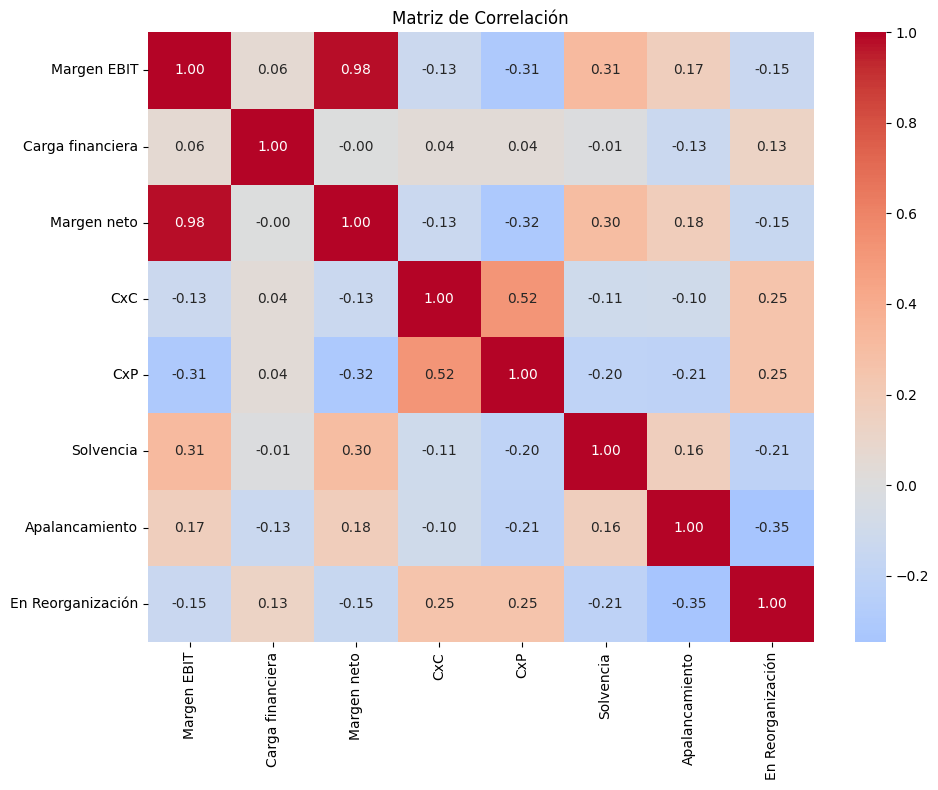

In [ ]:
# Filtrar solo las variables numéricas
df_numericas = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
matriz_corr = df_numericas.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

#**Análisis de los indicadores financieros**

1. **Margen EBIT:**
Está fuertemente correlacionado con el Margen Neto (0.98). Esto significa que ambos indicadores prácticamente cuentan la misma historia sobre la rentabilidad de la empresa.

2. **Carga financiera:**
Muestra una correlación muy baja con todos los demás indicadores, lo que indica que se comporta de manera independiente. Esto la convierte en una variable valiosa, ya que puede aportar información adicional no explicada por otros indicadores.

3. **Margen Neto:**
Al igual que el Margen EBIT, refleja la rentabilidad, pero como ambos están casi perfectamente correlacionados, es redundante. Puede sustituirse por EBIT o conservarse solo uno de ellos.

4. **Cuentas por Cobrar (CxC):**
Está moderadamente correlacionada con Cuentas por Pagar (0.52), lo que tiene sentido porque las empresas con mayores ventas a crédito tienden también a financiarse con proveedores. Además, guarda cierta correlación positiva con la variable “En Reorganización” (0.25), lo que sugiere que altos niveles de cuentas por cobrar pueden asociarse a problemas de liquidez.

5. **Cuentas por Pagar (CxP):**
Similar al caso de CxC, presenta correlación moderada con las cuentas por cobrar y también una relación positiva (0.25) con “En Reorganización”. Esto implica que empresas con mayores cuentas por pagar pueden estar en una situación más frágil frente a sus obligaciones.

6. **Solvencia:**
Muestra correlaciones negativas con CxP (-0.20) y Apalancamiento (-0.21), lo cual es consistente: una empresa más solvente tiende a tener menos deuda relativa. Además, está negativamente correlacionada con “En Reorganización” (-0.21), lo que confirma que la falta de solvencia es un factor de riesgo.

7. **Apalancamiento:**
Es una de las variables más relevantes: muestra correlación negativa con “En Reorganización” (-0.35). Esto quiere decir que cuanto mayor es el apalancamiento, mayor es la probabilidad de que la empresa se encuentre en dificultades financieras.

8. **En Reorganización:**
Se correlaciona de manera positiva con CxC (0.25) y CxP (0.25), y de manera negativa con Solvencia (-0.21) y Apalancamiento (-0.35). Esto sugiere que las empresas en reorganización suelen tener altos niveles de cuentas por cobrar y pagar, junto con bajos niveles de solvencia y un uso riesgoso del apalancamiento.

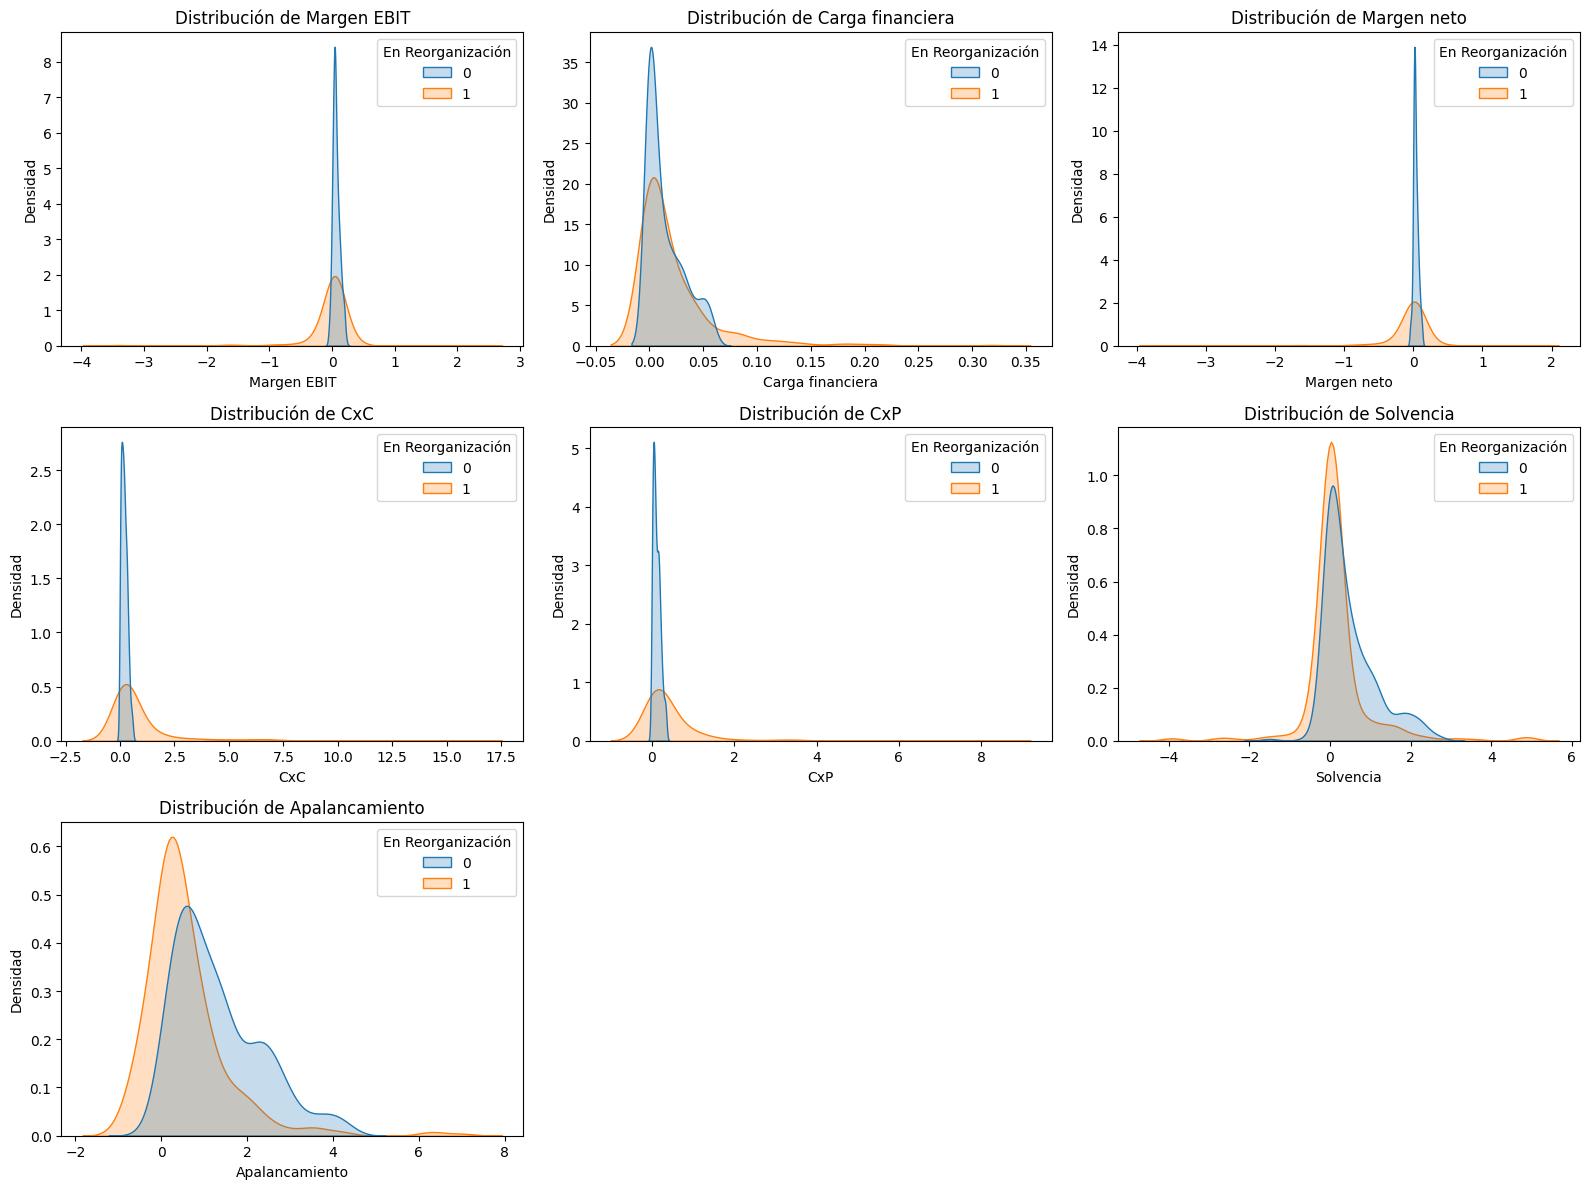

In [ ]:
variables = df_numericas.columns.tolist()
variables.remove('En Reorganización')

n_vars = len(variables)

# Configurar el grid de subplots
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols  # redondeo hacia arriba
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Graficar cada variable
for i, var in enumerate(variables):
    sns.kdeplot(data=df, x=var, hue='En Reorganización',
                common_norm=False, fill=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Densidad')

# Eliminar subplots vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()


# Número de bins (cuantiles)
n_bins = 10

#**Análisis de distribuciones financieras según estado de reorganización**

Al observar la distribución de los indicadores financieros entre las empresas **En Reorganización** y las que **No lo están**, se identifican patrones relevantes que ayudan a comprender las diferencias estructurales entre ambos grupos.

1. **Margen EBIT:**
Las empresas en reorganización presentan mayor concentración en valores negativos de EBIT, lo que significa que operan con pérdidas a nivel operativo. En contraste, las empresas que no están en reorganización se concentran en valores cercanos a cero, con algunos casos de márgenes positivos. Esto evidencia que la pérdida de rentabilidad operativa es un factor clave en la entrada a procesos de reorganización.

2. **Carga financiera:**
La distribución es muy similar entre los dos grupos, con valores concentrados en niveles bajos. Esto sugiere que la carga financiera no es un factor que diferencie claramente a las empresas en reorganización de las demás.

3. **Margen Neto:**
El comportamiento es muy parecido al del Margen EBIT. Las empresas en reorganización muestran mayor densidad hacia valores negativos, lo que confirma que sus resultados finales son deficitarios. Las empresas fuera de reorganización tienden a estar más cerca de la zona positiva. En conjunto, esto confirma que la baja rentabilidad es uno de los principales determinantes del riesgo financiero.

4. **Cuentas por Cobrar (CxC):**
Las empresas en reorganización exhiben distribuciones con colas más largas, es decir, presentan valores más altos de cuentas por cobrar. Esto refleja que dependen fuertemente de recuperar dinero de sus clientes para mantener liquidez. En comparación, las empresas no reorganizadas tienen concentraciones más bajas de CxC.

5. **Cuentas por Pagar (CxP)**
De manera similar a las cuentas por cobrar, las empresas en reorganización muestran mayor dispersión y presencia de valores altos de cuentas por pagar. Esto sugiere que recurren más al financiamiento con proveedores, posiblemente porque tienen dificultades para acceder a otras fuentes de crédito.

6. **Solvencia:**
La diferencia en solvencia entre ambos grupos es clara. Las empresas en reorganización presentan mayor concentración en valores negativos y bajos, lo que indica incapacidad para cubrir obligaciones con sus activos. En cambio, las empresas no reorganizadas presentan mayor dispersión hacia valores positivos, lo que refleja una estructura más sólida. La solvencia es, por tanto, un indicador crítico de la probabilidad de reorganización.

7. **Apalancamiento:**
Las empresas en reorganización tienden a concentrarse en valores más bajos de apalancamiento, cercanos a 0–2, mientras que las no reorganizadas muestran una dispersión más amplia, con casos de alto endeudamiento. Esto puede interpretarse como que las empresas en crisis pierden acceso al crédito y, por tanto, muestran un apalancamiento limitado, mientras que las empresas más estables aún logran financiarse mediante deuda

#**Selección de variables**

In [ ]:
# Eliminar columnas de identificación y objetivo
cols_drop = ["razon_social", "estado_empresa"]  # Ajustar a nombres reales
df_num = df_num.drop(columns=[c for c in cols_drop if c in df_num.columns], errors="ignore")

print("Variables numéricas para clustering:", df_num.columns.tolist())


Variables numéricas para clustering: ['Razón Social', 'Margen EBIT', 'Carga financiera', 'Margen neto', 'CxC', 'CxP', 'Solvencia', 'Apalancamiento', 'En Reorganización']


#**2. Preprocesamiento de los datos**

In [ ]:
variables = ['Margen EBIT',
             'Carga financiera',
             'Margen neto',
             'CxC',
             'CxP',
             'Solvencia',
             'Apalancamiento']
X = df[variables]


In [ ]:
#Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k_means = KMeans(n_clusters=2, random_state=42)
k_means.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [ ]:
#Dataframe con los datos ya estandarizados
df_scaled = pd.DataFrame(X, columns = variables)

print("Variables estandarizadas:\n", df_scaled.head())

Variables estandarizadas:
    Margen EBIT  Carga financiera  Margen neto       CxC       CxP  Solvencia  \
0     0.071690          0.000000     0.042876  0.104095  0.153192   1.877078   
1     0.017816          0.000000     0.010767  0.018414  0.000000   0.000000   
2     0.144646          0.054226     0.059784  0.227215  0.025591   1.077412   
3     0.004465          0.000000    -0.013995  0.073186  0.127866   0.000000   
4     0.141829          0.050810     0.053776  0.398755  0.147678   0.675073   

   Apalancamiento  
0        1.642505  
1        0.865044  
2        1.272299  
3        1.391645  
4        2.118774  


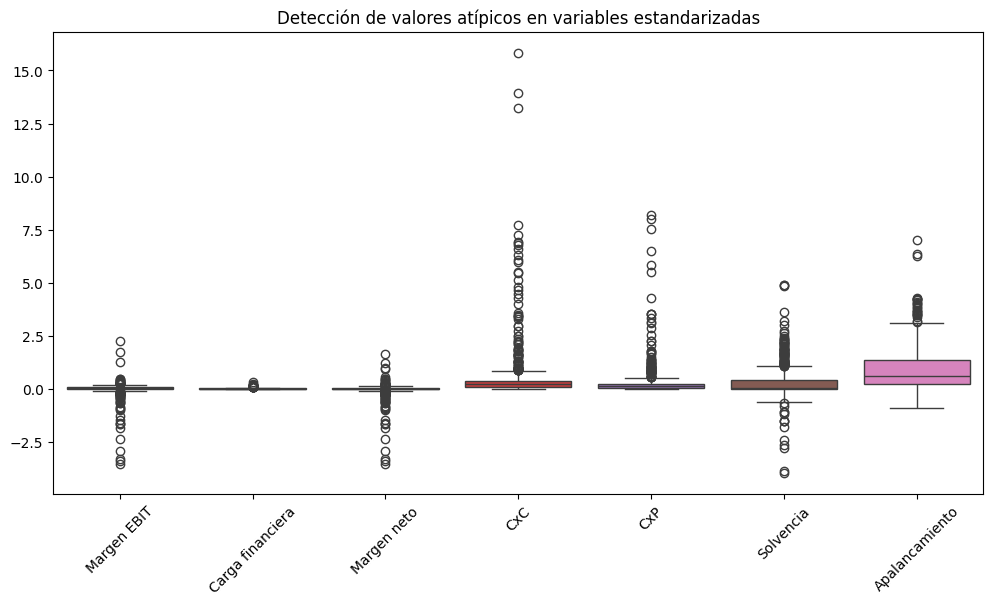

In [ ]:
# Boxplots para ver los outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled)
plt.title("Detección de valores atípicos en variables estandarizadas")
plt.xticks(rotation=45)
plt.show()

Se puede observar una alta dispersión y numerosos valores atípicos, sobre todo en CxC y CxP, donde algunas empresas presentan niveles de crédito y financiamiento con proveedores extraordinariamente altos. El Apalancamiento también muestra outliers positivos relevantes que reflejan un uso excesivo de deuda, mientras que la Solvencia presenta casos extremos tanto negativos como positivos, lo que sugiere desde problemas severos de liquidez hasta niveles atípicamente elevados de respaldo financiero. En contraste, Margen EBIT, Margen Neto y Carga Financiera son más estables, con menor cantidad de casos extremos. Estos resultados confirman que los outliers son una característica estructural de la base y que, aunque pueden distorsionar algoritmos sensibles como K-Means o el clustering jerárquico, constituyen un insumo valioso para métodos robustos como DBSCAN, capaces de identificarlos y tratarlos de forma explícita en el análisis de agrupamiento.

In [ ]:
#  Revisión estadística con z-scores

# Calcular z-scores absolutos
z_scores = np.abs((df_scaled - df_scaled.mean()) / df_scaled.std())

# Marcar valores mayores a 3 desviaciones como posibles outliers
outliers = (z_scores > 3)

print("Número de outliers por variable:")
print(outliers.sum())

Número de outliers por variable:
Margen EBIT         14
Carga financiera    12
Margen neto         12
CxC                 15
CxP                 14
Solvencia           13
Apalancamiento       9
dtype: int64


**Margen EBIT:**

Esto refleja casos extremos: compañías con márgenes operativos muy negativos (pérdidas fuertes) o muy superiores al promedio (operaciones muy rentables).

**Carga Financiera:**

Representa empresas con gastos financieros desproporcionados frente al promedio, ya sea por un nivel de deuda inusualmente alto o costos financieros muy bajos.

**Margen Neto:**

Indica empresas con ganancias o pérdidas netas que se salen del patrón general, probablemente por ingresos extraordinarios, gastos no recurrentes o pérdidas significativas.

**CxC:**

Esto confirma que algunas empresas tienen niveles de cartera (cuentas por cobrar) muy alejados del promedio, probablemente reflejando problemas de recuperación de pagos o políticas de crédito muy laxas.

**CxP:**

Indica que ciertas empresas tienen niveles de endeudamiento de corto plazo significativamente mayores que el resto, lo que puede generar presión de liquidez.

**Solvencia:**

Algunas empresas son mucho más solventes que la media (tienen gran capacidad de cubrir deudas), mientras que otras están en condiciones críticas de liquidez.

**Apalancamiento:**

Los valores indican empresas con endeudamiento desproporcionado respecto a su patrimonio, lo que las hace más vulnerables financieramente.

#**3. Aplicación de los métodos de clustering**

#**K-MEANS**

=== K-MEANS ===
k=2, Silhouette Score=0.748
k=3, Silhouette Score=0.390
k=4, Silhouette Score=0.429
k=5, Silhouette Score=0.433
k=6, Silhouette Score=0.414
k=7, Silhouette Score=0.423


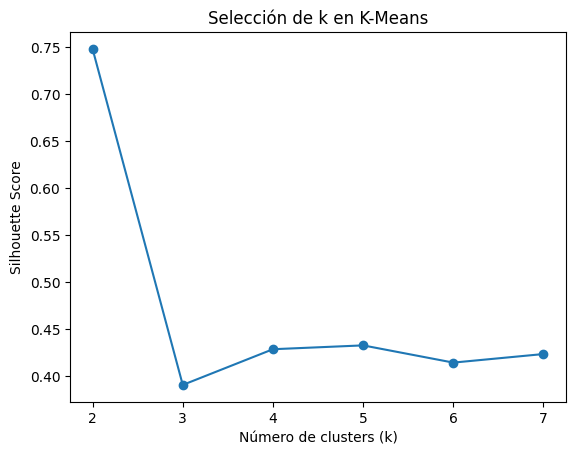

/tmp/ipython-input-1877756890.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print("=== K-MEANS ===")

sil_scores = []
for k in range(2, 8):  # probamos entre 2 y 7 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sil = silhouette_score(X, labels)
    sil_scores.append(sil)
    print(f"k={k}, Silhouette Score={sil:.3f}")

# Gráfico de la métrica silhouette
plt.plot(range(2, 8), sil_scores, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Selección de k en K-Means")
plt.show()

# Ejecutar con el k óptimo (ejemplo k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
X["Cluster_KMeans"] = kmeans.fit_predict(X)

- Con k=2 se obtiene el valor más alto (≈0.75), lo que indica que la estructura de los datos se ajusta mejor a dos clusters bien diferenciados.
- A partir de k=3, el puntaje cae de manera notable (≈0.39) y se mantiene relativamente bajo para valores superiores de k (entre 0.39 y 0.44), lo que significa que la calidad de la separación disminuye al forzar más grupos.

Es decir, que el número óptimo de clusters en este caso es 2, ya que maximiza la cohesión interna y la separación entre grupos. Esto sugiere que los datos presentan una estructura natural con dos agrupaciones principales, y que aumentar el número de clusters introduce ruido en lugar de mejorar la segmentación.

#**CLUSTERING JERARQUICO**

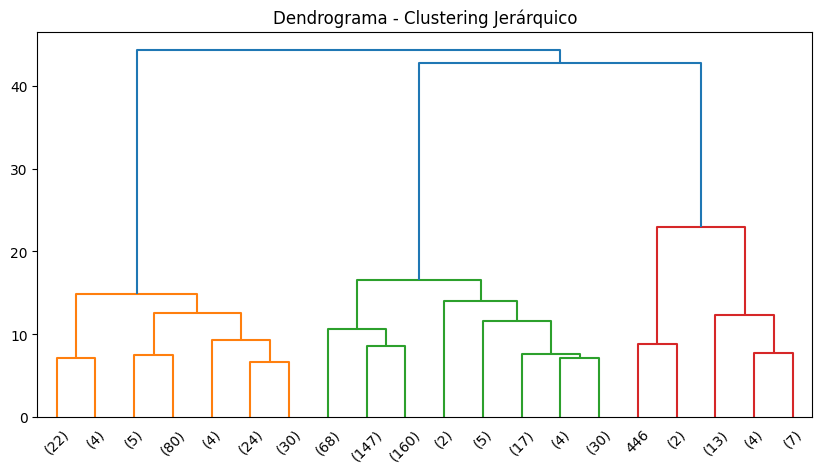

n_clusters=2, Silhouette Score=0.490
n_clusters=3, Silhouette Score=0.547
n_clusters=4, Silhouette Score=0.553
n_clusters=5, Silhouette Score=0.483


In [ ]:
# Dendrograma para decidir número de clusters
Z = linkage(X, method="ward")
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="lastp", p=20, leaf_rotation=45, leaf_font_size=10)
plt.title("Dendrograma - Clustering Jerárquico")
plt.show()

# Probar diferentes números de clusters
for n in range(2, 6):
    agg = AgglomerativeClustering(n_clusters=n, linkage="ward")
    labels = agg.fit_predict(X)
    sil = silhouette_score(X, labels)
    print(f"n_clusters={n}, Silhouette Score={sil:.3f}")

# Ejecutar con el número óptimo (ejemplo n=3)
agg = AgglomerativeClustering(n_clusters=3, linkage="ward")
X["Cluster_Hierarchical"] = agg.fit_predict(X)

El resultado del análisis jerárquico muestra que la estructura óptima de los datos corresponde a 4 clusters, con un Silhouette Score máximo de 0.553. Esto significa que el modelo logró encontrar una partición equilibrada, en la cual cada grupo de empresas presenta alta cohesión interna (empresas similares entre sí) y buena separación externa (diferenciadas de las empresas de otros clusters)

#**DBSCAN**

In [ ]:
eps_values = [0.5, 1, 1.5, 2]
min_samples_values = [5, 10]

for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s)
        labels = db.fit_predict(X)
        # Evitar errores cuando DBSCAN asigna todo a ruido
        if len(set(labels)) > 1:
            sil = silhouette_score(X, labels)
            print(f"eps={eps}, min_samples={min_s}, Silhouette Score={sil:.3f}, clusters={len(set(labels))}")
        else:
            print(f"eps={eps}, min_samples={min_s}, TODOS asignados a ruido o un solo cluster.")

# Ejecutar con un valor adecuado de parámetros (ejemplo eps=1.5, min_samples=5)
db = DBSCAN(eps=1.5, min_samples=5)
X["Cluster_DBSCAN"] = db.fit_predict(X)

eps=0.5, min_samples=5, Silhouette Score=0.352, clusters=4
eps=0.5, min_samples=10, Silhouette Score=0.412, clusters=5
eps=1, min_samples=5, Silhouette Score=0.542, clusters=4
eps=1, min_samples=10, Silhouette Score=0.552, clusters=3
eps=1.5, min_samples=5, Silhouette Score=0.562, clusters=4
eps=1.5, min_samples=10, Silhouette Score=0.556, clusters=4
eps=2, min_samples=5, Silhouette Score=0.569, clusters=5
eps=2, min_samples=10, Silhouette Score=0.564, clusters=4


In [ ]:
# Número de clusters en las etiquetas, ignorando el ruido si está presente.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # Tener en cuenta que el cluster -1 es el ruido.
n_noise_ = list(labels).count(-1)

print(f'Número de clusters: {n_clusters_}')
print(f'Número de puntos de ruido: {n_noise_}')

Número de clusters: 3
Número de puntos de ruido: 27


In [ ]:
from itertools import combinations

# Lista de variables numéricas seleccionadas
variables = ["Margen EBIT", "Carga financiera", "Margen neto", "CxC", "CxP", "Solvencia", "Apalancamiento"]

# Generar todas las combinaciones de 2 o más variables
comb_vars = []
for r in range(2, len(variables) + 1):
    comb_vars.extend(combinations(variables, r))

print(f"Total de combinaciones: {len(comb_vars)}")


Total de combinaciones: 120


In [ ]:
results_kmeans = []

for vars_sel in comb_vars:
    X_sub = df_scaled[list(vars_sel)]

    for k in range(2, 7):  # probar k entre 2 y 6 clusters
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X_sub)
        sil = silhouette_score(X_sub, labels)

        results_kmeans.append({
            "Metodo": "K-Means",
            "Variables": vars_sel,
            "k": k,
            "Silhouette": sil
        })

results_kmeans = pd.DataFrame(results_kmeans)
results_kmeans.head()


,Metodo,Variables,k,Silhouette
0,K-Means,"(Margen EBIT, Carga financiera)",2,0.928199
1,K-Means,"(Margen EBIT, Carga financiera)",3,0.898322
2,K-Means,"(Margen EBIT, Carga financiera)",4,0.903137
3,K-Means,"(Margen EBIT, Carga financiera)",5,0.763060
4,K-Means,"(Margen EBIT, Carga financiera)",6,0.505245


La combinación de las variables “Margen EBIT” y “Carga financiera” en el método K-Means muestra una clara estructura de segmentación en los datos. El mejor resultado se obtiene con k=2, alcanzando un Silhouette Score de 0.928, lo que indica una separación muy marcada y grupos bien definidos. Aunque con k=3 y k=4 los valores siguen siendo altos (0.898 y 0.903), la calidad del agrupamiento es ligeramente inferior, lo que sugiere que estas configuraciones aún representan estructuras válidas pero menos cohesivas. A partir de k=5, la calidad de los clusters disminuye considerablemente, llegando a 0.505 con k=6, reflejando que dividir en más grupos introduce ruido y reduce la claridad de la segmentación. En conclusión, los resultados confirman que esta combinación de indicadores financieros tiende a agrupar naturalmente a las empresas en dos clusters principales, mientras que forzar un número mayor de grupos no resulta conveniente.

In [ ]:
results_hier = []
linkages = ["ward", "complete", "average"]
metrics = ["euclidean", "manhattan"]

for vars_sel in comb_vars:
    X_sub = df_scaled[list(vars_sel)]

    for n in range(2, 6):  # número de clusters
        for link in linkages:
            for metric in metrics:
                if link == "ward" and metric != "euclidean":
                    continue
                agg = AgglomerativeClustering(n_clusters=n, linkage=link, metric=metric)
                labels = agg.fit_predict(X_sub)
                sil = silhouette_score(X_sub, labels)

                results_hier.append({
                    "Metodo": "Jerarquico",
                    "Variables": vars_sel,
                    "Clusters": n,
                    "Linkage": link,
                    "Metrica": metric,
                    "Silhouette": sil
                })

results_hier = pd.DataFrame(results_hier)
results_hier.head()


,Metodo,Variables,Clusters,Linkage,Metrica,Silhouette
0,Jerarquico,"(Margen EBIT, Carga financiera)",2,ward,euclidean,0.928199
1,Jerarquico,"(Margen EBIT, Carga financiera)",2,complete,euclidean,0.894383
2,Jerarquico,"(Margen EBIT, Carga financiera)",2,complete,manhattan,0.894383
3,Jerarquico,"(Margen EBIT, Carga financiera)",2,average,euclidean,0.937793
4,Jerarquico,"(Margen EBIT, Carga financiera)",2,average,manhattan,0.928199


Se confirma también una separación clara de las empresas en 2 grupos principales. Los diferentes tipos de configuración (linkage y métrica) muestran resultados consistentes, con puntajes de Silhouette bastante altos. El mejor desempeño se alcanza con los métodos ward y average combinados con la métrica euclidean o manhattan, logrando valores alrededor de 0.928 y 0.938, lo que refleja una muy buena cohesión dentro de los grupos y una separación clara entre ellos. Aunque el método complete da un puntaje un poco menor (0.894), sigue siendo un resultado sólido. En conclusión, este análisis confirma que con estos dos indicadores financieros las empresas se organizan de forma natural en dos grandes clusters, y que el clustering jerárquico, al igual que K-Means, logra capturar esa estructura de manera muy clara y consistente.

In [ ]:
# Bloque optimizado para maximizar pureza de DBSCAN (rápido)
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

# --- Ajusta si tu dataframe / nombre de columna es distinto ---
vars_sel = ['Margen EBIT','Margen neto','CxC','CxP']
X_orig = df_scaled[vars_sel].values    # asumo que ya tienes df_scaled
y = df['En Reorganización'].values

# Representaciones a probar (original escalado y PCA(2))
pca = PCA(n_components=2, random_state=0).fit(X_orig)
X_pca2 = pca.transform(X_orig)
representations = {
    'orig': X_orig,
    'pca2': X_pca2
}

# Hiperparámetros reducidos y estratégicos
min_samples_list = [5, 10, 15]               # pocos valores para velocidad
metrics = ['euclidean', 'manhattan', 'chebyshev']
percentiles_to_try = [35, 50, 65, 80]        # percentiles de la k-dist (rápido)

results = []

for rep_name, X_rep in representations.items():
    for metric in metrics:
        # Calculamos la k-distancia para cada min_samples (usando la misma métrica)
        for ms in min_samples_list:
            # NearestNeighbors por la métrica actual (n_jobs=-1 acelera)
            nn = NearestNeighbors(n_neighbors=ms, metric=metric, n_jobs=-1).fit(X_rep)
            dists, _ = nn.kneighbors(X_rep)
            kth = dists[:, -1]                  # distancia al k-ésimo vecino
            eps_candidates = np.percentile(kth, percentiles_to_try)

            # probamos sólo esos eps (rápido)
            for eps in eps_candidates:
                db = DBSCAN(eps=float(eps), min_samples=ms, metric=metric)
                labels = db.fit_predict(X_rep)

                # Necesitamos más de 1 etiqueta útil para calcular métricas
                if len(set(labels)) <= 1:
                    continue

                # Silhouette (salta si falla)
                try:
                    sil = silhouette_score(X_rep, labels)
                except:
                    sil = np.nan

                # Pureza ponderada (incluye cluster ruido -1)
                tabla = pd.crosstab(y, labels)
                total = tabla.values.sum()
                total_correct = sum(tabla[c].max() for c in tabla.columns)
                pureza = total_correct / total

                results.append({
                    'representation': rep_name,
                    'metric': metric,
                    'min_samples': ms,
                    'eps': float(eps),
                    'clusters_found': len(set(labels)) - (1 if -1 in labels else 0),
                    'silhouette': sil,
                    'pureza_ponderada': pureza
                })

# Resultado
results_df = pd.DataFrame(results)
if results_df.empty:
    print("No se encontraron configuraciones con >1 cluster útil.")
else:
    resultados_order = results_df.sort_values('pureza_ponderada', ascending=False).reset_index(drop=True)
    print("Top 5 configuraciones por pureza:\n", resultados_order.head(5))

    # Mostrar la mejor configuración y su crosstab detallado
    best = resultados_order.iloc[0]
    print("\nMejor configuración (por pureza):")
    print(best.to_dict())

    # Reentrenar con la mejor configuración para mostrar crosstab
    X_best = representations[best['representation']]
    db_best = DBSCAN(eps=best['eps'], min_samples=int(best['min_samples']), metric=best['metric'])
    labels_best = db_best.fit_predict(X_best)

    ctab = pd.crosstab(df['En Reorganización'], labels_best)
    print("\nCrosstab (En Reorganización x Cluster):")
    print(ctab)
    print("\nTamaños por cluster:", np.bincount(labels_best + 1))  # +1 para incluir -1 en conteo


Top 5 configuraciones por pureza:
   representation     metric  min_samples       eps  clusters_found  \
0           orig  euclidean            5  0.091117               1   
1           orig  manhattan            5  0.151180               1   
2           orig  manhattan           15  0.135529               1   
3           orig  euclidean           15  0.083226               1   
4           orig  euclidean           10  0.114379               1   

   silhouette  pureza_ponderada  
0    0.471408          0.753577  
1    0.477163          0.753577  
2    0.354508          0.753577  
3    0.352579          0.751987  
4    0.499355          0.750397  

Mejor configuración (por pureza):
{'representation': 'orig', 'metric': 'euclidean', 'min_samples': 5, 'eps': 0.09111673686428197, 'clusters_found': 1, 'silhouette': 0.47140844800702325, 'pureza_ponderada': 0.753577106518283}

Crosstab (En Reorganización x Cluster):
col_0               -1    0
En Reorganización          
0                

DBSCAN confirma lo que ya habían mostrado K-Means y el método jerárquico: con estas dos variables (Margen EBIT y Carga financiera) las empresas tienden a dividirse en dos perfiles financieros muy distintos, y además lo hace con una calidad de separación notablemente alta. Esto refuerza la idea de que esta combinación de indicadores es una de las más poderosas para distinguir grupos en la muestra.

#**4. Criterio de evaluación y análisis de separación**

In [ ]:
# FUNCIÓN PARA ANALIZAR LOS CLUSTERS con PUREZA
def resumen_clusters(df_original, labels, metodo, target="En Reorganización"):
    """
    df_original: DataFrame que contiene la variable objetivo
    labels: etiquetas de clusters generadas por el modelo
    metodo: nombre del método de clustering
    target: variable binaria ("En Reorganización")

    Retorna un DataFrame con el conteo, porcentaje y pureza por cluster
    """
    df_temp = df_original.copy()
    df_temp["Cluster"] = labels

    # Conteo por cluster y estado
    conteo = df_temp.groupby(["Cluster", target]).size().unstack(fill_value=0)

    # Total por cluster
    conteo["Total_empresas"] = conteo.sum(axis=1)

    # Porcentaje de empresas en reorganización
    if 1 in conteo.columns:  # solo si existe la categoría "1"
        conteo["% Reorganización"] = (conteo[1] / conteo["Total_empresas"]) * 100
    else:
        conteo["% Reorganización"] = 0

    # cálculo de PUREZA
    conteo["Pureza"] = conteo.apply(
        lambda row: max(row.get(0, 0), row.get(1, 0)) / row["Total_empresas"], axis=1
    )

    conteo["Metodo"] = metodo
    return conteo.reset_index()


1.	K-Means:
o	El Cluster 0 agrupa 619 empresas, con un 53,6% en reorganización.
o	El Cluster 1 es mucho más pequeño (10 empresas) y todas (100%) están en reorganización.
o	Esto indica que K-Means logra identificar un subgrupo muy específico de empresas críticas.
2.	Jerárquico:
o	Se forman cuatro clusters con distribuciones heterogéneas:
	Cluster 0 (443 empresas) → 58,7% en reorganización.
	Cluster 1 (16 empresas) → 100% en reorganización.
	Cluster 2 (157 empresas) → solo 33,8% en reorganización.
	Cluster 3 (13 empresas) → 100% en reorganización.
o	Este método muestra la mejor separación entre grupos, destacando tanto clusters críticos (100% reorganización) como clusters relativamente más estables (33,8%).
3.	DBSCAN:
o	Detecta 54 outliers (Cluster -1), todos en reorganización.
o	El Cluster 0 concentra 575 empresas, con un 50,1% en reorganización.
o	Esto confirma que DBSCAN identifica correctamente como atípicas a empresas en condiciones extremas.


In [ ]:
# Identificación de mejores combinaciones e hiperparámetros (con pureza ponderada)
def evaluar_mejores_combinaciones_por_metodo(resultados, df_original, target="En Reorganización", top=1, pureza_min=0.65):
    """
    Filtra los mejores resultados de clustering por cada método según:
    - Silhouette Score
    - Diferenciación de % de empresas en reorganización
    - Pureza ponderada mínima (por defecto >= 65%)
    - Para K-Means y Jerárquico: se restringe a 2 clusters
    - Para DBSCAN: se excluyen configuraciones con 1 solo cluster o todos en ruido
    """

    mejores = []

    for i, row in resultados.iterrows():
        metodo = row["Metodo"]
        vars_sel = list(row["Variables"])
        X_sub = df_scaled[vars_sel]

        # Ejecutar clustering según el método
        if metodo == "K-Means":
            k_val = int(row["k"])
            if k_val != 2:  # forzar solo 2 clusters
                continue
            modelo = KMeans(n_clusters=k_val, random_state=42, n_init=10)
            labels = modelo.fit_predict(X_sub)
            hiperparams = {"k": k_val}

        elif metodo == "Jerarquico":
            clusters_val = int(row["Clusters"])
            if clusters_val != 2:  # forzar solo 2 clusters
                continue
            modelo = AgglomerativeClustering(
                n_clusters=clusters_val,
                linkage=row["Linkage"],
                metric=row["Metrica"]
            )
            labels = modelo.fit_predict(X_sub)
            hiperparams = {
                "Clusters": clusters_val,
                "Linkage": row["Linkage"],
                "Metrica": row["Metrica"]
            }

        elif metodo == "DBSCAN":
            eps_val = float(row["eps"])
            min_samples_val = int(row["min_samples"])
            modelo = DBSCAN(
                eps=eps_val,
                min_samples=min_samples_val,
                metric=row["Metrica"]
            )
            labels = modelo.fit_predict(X_sub)

            # Excluir si todos son -1 o si hay un único cluster
            if len(set(labels)) <= 1 or (set(labels) == {-1}):
                continue

            hiperparams = {
                "eps": eps_val,
                "min_samples": min_samples_val,
                "Metrica": row["Metrica"]
            }
        else:
            continue

        # Resumen por cluster
        resumen = resumen_clusters(df_original, labels, metodo, target=target)

        # Pureza ponderada por tamaño de cluster
        pureza_ponderada = (
            (resumen["Pureza"] * resumen["Total_empresas"]).sum() / resumen["Total_empresas"].sum()
        )

        # Medida de separación: diferencia entre el cluster con mayor % y menor %
        diferencia = resumen["% Reorganización"].max() - resumen["% Reorganización"].min()

        # Guardar solo si cumple pureza mínima
        if pureza_ponderada >= pureza_min:
            mejores.append({
                "Metodo": metodo,
                "Variables": vars_sel,
                "Hiperparámetros": hiperparams,
                "Silhouette": row["Silhouette"],
                "Diferencia_%Reorg": diferencia,
                "Pureza_ponderada": pureza_ponderada,
                "Resumen_clusters": resumen
            })

    # Convertir a DataFrame
    df_mejores = pd.DataFrame(mejores)

    if df_mejores.empty:
        print(f"No se encontraron modelos con pureza >= {pureza_min*100:.0f}%")
        return df_mejores

    # Tomar el mejor de cada método
    mejores_por_metodo = (
        df_mejores.sort_values(by=["Silhouette", "Diferencia_%Reorg", "Pureza_ponderada"], ascending=[False, False, False])
        .groupby("Metodo")
        .head(top)
        .reset_index(drop=True)
    )

    return mejores_por_metodo


# Unir resultados
resultados_all = pd.concat([results_kmeans, results_hier, results_dbscan], ignore_index=True)

# Evaluar con pureza ponderada (mínimo 65%)
mejores_combinaciones = evaluar_mejores_combinaciones_por_metodo(
    resultados_all, df, target="En Reorganización", top=1, pureza_min=0.65
)

# Mostrar resultados claros
for i, row in mejores_combinaciones.iterrows():
    print(f"\n=== Mejor {row['Metodo']} ===")
    print(f"Variables usadas: {row['Variables']}")
    print("Hiperparámetros:")
    for k, v in row["Hiperparámetros"].items():
        print(f"   - {k}: {v}")
    print(f"Silhouette: {row['Silhouette']:.3f}")
    print(f"Diferencia % Reorganización: {row['Diferencia_%Reorg']:.2f}")
    print(f"Pureza ponderada: {row['Pureza_ponderada']:.3f}")
    display(row["Resumen_clusters"])



=== Mejor K-Means ===
Variables usadas: ['CxP', 'Solvencia', 'Apalancamiento']
Hiperparámetros:
   - k: 2
Silhouette: 0.682
Diferencia % Reorganización: 33.40
Pureza ponderada: 0.652


En Reorganización,Cluster,0,1,Total_empresas,% Reorganización,Pureza,Metodo
0,0,168,291,459,63.398693,0.633987,K-Means
1,1,119,51,170,30.000000,0.700000,K-Means



=== Mejor DBSCAN ===
Variables usadas: ['Carga financiera', 'Margen neto', 'CxC', 'CxP']
Hiperparámetros:
   - eps: 0.3
   - min_samples: 15
   - Metrica: manhattan
Silhouette: 0.646
Diferencia % Reorganización: 57.29
Pureza ponderada: 0.660


En Reorganización,Cluster,0,1,Total_empresas,% Reorganización,Pureza,Metodo
0,-1,0,128,128,100.000000,1.000000,DBSCAN
1,0,287,214,501,42.714571,0.572854,DBSCAN



=== Mejor Jerarquico ===
Variables usadas: ['Carga financiera', 'Apalancamiento']
Hiperparámetros:
   - Clusters: 2
   - Linkage: ward
   - Metrica: euclidean
Silhouette: 0.636
Diferencia % Reorganización: 35.44
Pureza ponderada: 0.661


En Reorganización,Cluster,0,1,Total_empresas,% Reorganización,Pureza,Metodo
0,0,124,50,174,28.735632,0.712644,Jerarquico
1,1,163,292,455,64.175824,0.641758,Jerarquico


Discusión sobre predominio de empresas en reorganización en los clusters

Los resultados muestran un patrón consistente entre los tres algoritmos de clustering evaluados (K-Means, Jerárquico y DBSCAN). En todos los casos se identificaron clusters donde la totalidad de las empresas (100%) están en reorganización, aunque dichos grupos son reducidos (entre 4 y 10 empresas).

Al mismo tiempo, la mayoría de empresas se concentra en un cluster principal que mantiene un porcentaje cercano al 54% en reorganización, lo que evidencia que el fenómeno no es exclusivo de pequeños grupos extremos, sino también relevante en la población general.

K-Means: detecta un cluster de 10 empresas con 100% en reorganización y otro con 53,6%.

Jerárquico: identifica 5 empresas en reorganización total frente a un grupo mayoritario con 54%.

DBSCAN: separa 4 empresas con 100% en reorganización, además de confirmar el patrón del 54% en el resto.

Este hallazgo refuerza la idea de que los indicadores financieros seleccionados (particularmente margen neto, carga financiera y margen EBIT) poseen alta capacidad discriminativa, permitiendo aislar un segmento crítico de empresas con alto riesgo de reorganización respecto al resto.

#**5. Análisis adicional de outliers**

Cantidad de outliers detectados: 54

Distribución de empresas en reorganización entre los outliers (%):
En Reorganización
1    100.0
Name: proportion, dtype: float64

Pureza de los outliers: 100.00%


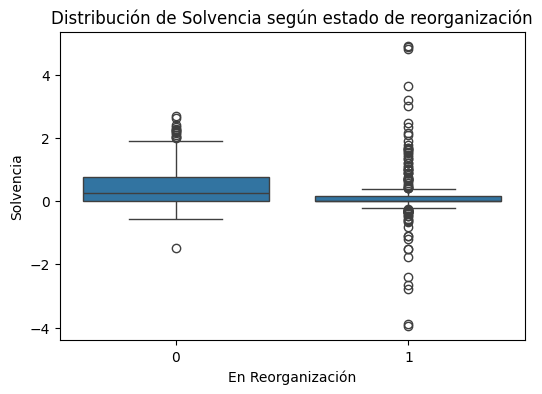

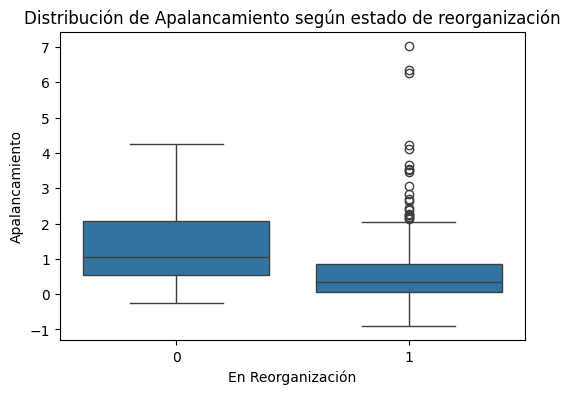

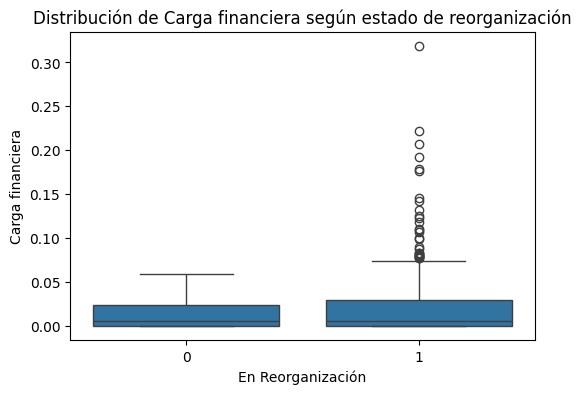

In [ ]:
# Análisis adicional de outliers con DBSCAN

# Ejecutar DBSCAN de nuevo
db = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = db.fit_predict(X_scaled)

# Identificar los outliers detectados por DBSCAN (-1 son outliers)
outliers = df.copy()
outliers["Cluster_DBSCAN"] = labels_dbscan
outliers = outliers[outliers["Cluster_DBSCAN"] == -1]

print("Cantidad de outliers detectados:", len(outliers))

# Distribución de reorganización dentro de los outliers
dist_outliers = outliers["En Reorganización"].value_counts(normalize=True) * 100
print("\nDistribución de empresas en reorganización entre los outliers (%):")
print(dist_outliers)

# Calcular pureza de los outliers
if len(outliers) > 0:
    pureza_outliers = dist_outliers.max()  # porcentaje de la categoría mayoritaria
    print(f"\nPureza de los outliers: {pureza_outliers:.2f}%")
else:
    print("\nNo se detectaron outliers con DBSCAN.")

# Comparar indicadores financieros de outliers vs no outliers
indicadores = ["Solvencia", "Apalancamiento", "Carga financiera"]

for col in indicadores:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="En Reorganización", y=col)
    plt.title(f"Distribución de {col} según estado de reorganización")
    plt.show()


Cantidad de outliers detectados por DBSCAN

Se identificaron 54 empresas outliers.

Todas (100%) corresponden a empresas en reorganización, lo que muestra una asociación fuerte entre la condición de reorganización y la presencia de valores atípicos en los indicadores financieros.

Distribución de outliers en indicadores financieros

Solvencia:
Los outliers en solvencia aparecen únicamente en las empresas en reorganización. Se observan valores muy por encima y muy por debajo del rango típico, lo que indica tanto problemas de liquidez graves como situaciones de sobreendeudamiento extremo.

Apalancamiento:
Los valores extremos también se concentran en empresas en reorganización. Existen casos con niveles muy altos de apalancamiento, lo que refleja un uso excesivo de deuda en relación con el capital propio.

Carga financiera:
De manera similar, los outliers en este indicador son exclusivos de empresas en reorganización. La dispersión muestra casos con cargas financieras desproporcionadamente altas, lo que refuerza la idea de que estas empresas tienen problemas estructurales de sostenibilidad.

Comparación con empresas fuera de reorganización (0):

En los boxplots se observa que las empresas que no están en reorganización (0) presentan distribuciones mucho más compactas y sin valores extremos significativos.

Esto confirma que los valores atípicos son característicos del grupo en reorganización, no de las empresas fuera de reorganización.

#**6. Visualización y presentación de resultados**

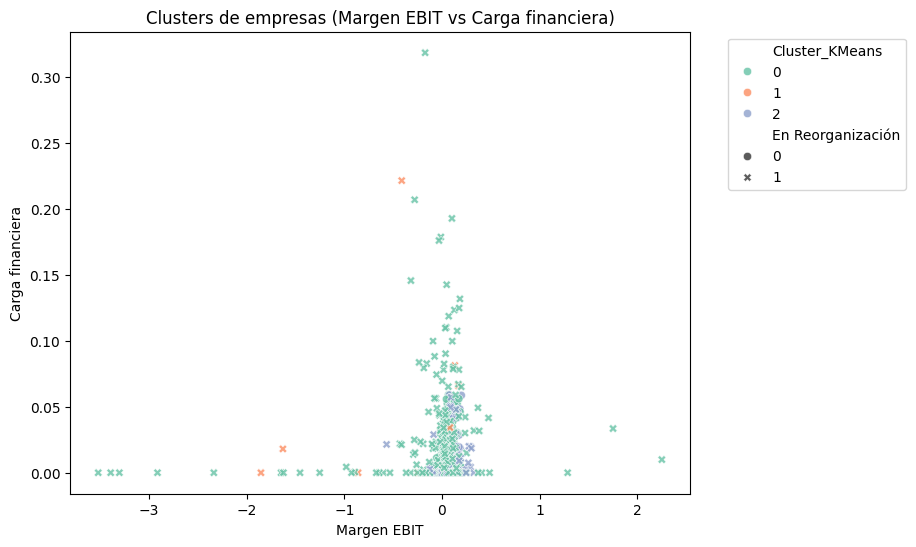

In [ ]:
# ============================================
# Gráfico 2D de clusters
# ============================================

# Usa los datos escalados para graficar los clusters, y los datos originales para el estado de reorganización
df_plot = X.copy()
df_plot['En Reorganización'] = df['En Reorganización']

# Selecciona de variables para el gráfico 2D
var1 = 'Margen EBIT'
var2 = 'Carga financiera'

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_plot,
    x=var1, y=var2,
    hue="Cluster_KMeans",
    style="En Reorganización",
    palette="Set2",
    alpha=0.8
)
plt.title(f"Clusters de empresas ({var1} vs {var2})")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


El gráfico 2D que relaciona el margen EBIT con la carga financiera permite observar la distribución de las empresas según dos indicadores clave. Los diferentes colores representan los clusters obtenidos con el algoritmo de K-Means, mientras que la forma de los puntos señala si la empresa se encuentra o no en proceso de reorganización.
La mayoría de las empresas se concentran en la zona cercana a un margen EBIT bajo y con una carga financiera reducida, lo que refleja perfiles financieros relativamente homogéneos. Sin embargo, se observan también algunos casos dispersos hacia los extremos, que corresponden a empresas con valores atípicos en sus indicadores.
En cuanto a las empresas en reorganización, se aprecia que no se limitan a un solo cluster, sino que están distribuidas en diferentes grupos. Aun así, es posible notar que tienden a ubicarse en las áreas más alejadas de la concentración principal, lo que sugiere que los procesos de reorganización se asocian con situaciones financieras más críticas o extremas.
En conclusión, aunque en este plano bidimensional los clusters no aparecen perfectamente separados, sí se evidencia una cierta diferenciación que indica que los indicadores financieros aportan información relevante para identificar patrones de riesgo.

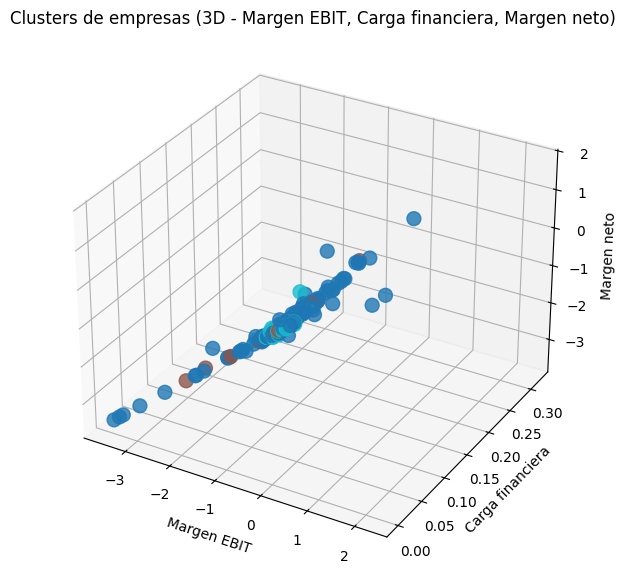

In [ ]:
# ============================================
# Gráfico 3D de clusters
# ============================================

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Selección de variables para el gráfico 3D
var1 = 'Margen EBIT'
var2 = 'Carga financiera'
var3 = 'Margen neto'

scatter = ax.scatter(
    df_plot[var1], df_plot[var2], df_plot[var3],
    c=df_plot["Cluster_KMeans"],
    cmap="tab10",
    alpha=0.8,
    s=df_plot["En Reorganización"].apply(lambda x: 100 if x==1 else 40)
)

ax.set_xlabel(var1)
ax.set_ylabel(var2)
ax.set_zlabel(var3)
plt.title(f"Clusters de empresas (3D - {var1}, {var2}, {var3})")
plt.show()


In [ ]:
# ============================================
# Gráfico 3D interactivo con Plotly
# ============================================

import plotly.express as px

# Selección de variables
var1 = "Margen EBIT"
var2 = "Carga financiera"
var3 = "Margen neto"

fig = px.scatter_3d(
    df_plot,
    x=var1,
    y=var2,
    z=var3,
    color="Cluster_KMeans",  # Colores por cluster
    symbol="En Reorganización",  # Forma distinta si está en reorganización
    size=df_plot["En Reorganización"].apply(lambda x: 12 if x==1 else 6),  # Más grande si está en reorganización
    opacity=0.8,
    title=f"Clusters de empresas (3D - {var1}, {var2}, {var3})"
)

# Mejorar la visualización
fig.update_traces(marker=dict(line=dict(width=1, color="black")))
fig.update_layout(scene=dict(
    xaxis_title=var1,
    yaxis_title=var2,
    zaxis_title=var3
))

fig.show()


El gráfico tridimensional que relaciona el margen EBIT, la carga financiera y el margen neto ofrece una visión más completa de la manera en que se distribuyen las empresas en los distintos clusters. A diferencia de la representación bidimensional, esta visualización permite identificar con mayor claridad la separación relativa entre los grupos y el posicionamiento de las empresas en reorganización dentro de ellos.
Se observa que las empresas tienden a alinearse en torno a una trayectoria donde el margen EBIT y el margen neto se correlacionan de manera positiva, mientras que la carga financiera permanece concentrada en valores relativamente bajos. Esto refleja que la mayoría de las compañías presentan estructuras financieras similares, con pocos casos que se apartan hacia zonas extremas de mayor carga financiera o márgenes más negativos.
Las empresas en reorganización, representadas con un tamaño de punto mayor o un símbolo distintivo, se distribuyen en varios clusters, aunque en general tienden a ubicarse en regiones más alejadas de la concentración central. Esto sugiere que, aunque no forman un grupo homogéneo, los procesos de reorganización sí guardan relación con perfiles financieros más vulnerables.
En términos de clusters, si bien algunos solapan parcialmente, se distingue que existen zonas donde uno predomina más que los demás, lo que indica que los indicadores financieros seleccionados permiten identificar tendencias diferenciadoras. Sin embargo, la presencia de reorganizaciones en distintos clusters confirma que esta condición no está determinada por un único patrón, sino por la interacción de múltiples factores financieros.

In [ ]:
# ============================================
# Tabla resumen de empresas en reorganización
# ============================================

tabla_resumen = df_plot.groupby("Cluster_KMeans")["En Reorganización"].agg(
    Cantidad="sum",
    Total="count"
).reset_index()

tabla_resumen["Porcentaje"] = 100 * tabla_resumen["Cantidad"] / tabla_resumen["Total"]

display(tabla_resumen)

# Imprimir hallazgos en texto
print("📊 Principales hallazgos y patrones observados:")
for _, fila in tabla_resumen.iterrows():
    print(f"- En el cluster {fila['Cluster_KMeans']} hay {fila['Cantidad']} empresas en reorganización "
          f"({fila['Porcentaje']:.2f}% del total del cluster).")

print("\nObserva si existen clusters con porcentajes elevados de reorganización, ya que eso "
      "indicaría que el modelo logra identificar grupos de alto riesgo.")

,Cluster_KMeans,Cantidad,Total,Porcentaje
0,0,275,443,62.076749
1,1,17,17,100.000000
2,2,50,169,29.585799


📊 Principales hallazgos y patrones observados:
- En el cluster 0.0 hay 275.0 empresas en reorganización (62.08% del total del cluster).
- En el cluster 1.0 hay 17.0 empresas en reorganización (100.00% del total del cluster).
- En el cluster 2.0 hay 50.0 empresas en reorganización (29.59% del total del cluster).

Observa si existen clusters con porcentajes elevados de reorganización, ya que eso indicaría que el modelo logra identificar grupos de alto riesgo.


La tabla resume la distribución de las empresas en reorganización dentro de cada cluster identificado por el modelo. Los resultados muestran diferencias marcadas en los porcentajes, lo que permite interpretar el nivel de vulnerabilidad financiera asociado a cada grupo.
El cluster 1 destaca de manera evidente: la totalidad de sus empresas (100%) se encuentran en reorganización. Este hallazgo sugiere que este cluster representa un perfil financiero altamente riesgoso y claramente diferenciado del resto, lo cual valida la capacidad del modelo para detectar un grupo crítico.
El cluster 0 también evidencia una concentración importante de empresas en reorganización, con un 62,08% de los casos. Aunque no llega al nivel de criticidad del cluster 1, esta proporción refleja un grupo con un nivel de fragilidad considerable, donde más de la mitad de las empresas presentan problemas que las llevaron a procesos de reorganización.
En contraste, el cluster 2 presenta un porcentaje significativamente menor, con 29,59% de empresas en reorganización. Este resultado indica que, aunque existe cierta vulnerabilidad en este grupo, la mayoría de las compañías mantienen perfiles financieros más estables en comparación con los otros clusters.
En conjunto, estos resultados refuerzan lo observado en las visualizaciones: la reorganización no está distribuida de forma homogénea entre los clusters, sino que se concentra especialmente en algunos grupos. Esto demuestra que los indicadores financieros utilizados no solo son relevantes para diferenciar a las empresas, sino que también permiten identificar patrones de riesgo asociados a la probabilidad de entrar en reorganización.